Title

Description

Importing packages.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing data into pandas DataFrame.

In [41]:
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
df.sample(5)

['fire_size_class', 'latitude', 'longitude', 'discovery_month', 'weekday', 'Vegetation', 'remoteness', 'elevation', 'Temp', 'Wind', 'Humidity', 'Precipitation']


Run the block below to get the dataset with spaciotemporal *(SPT)* data only.

    | Latitude | Longitude | Remoteness | Discovery month | Weekend |

In [43]:
# Separate target variable (fire_size_class) from predictor variables.
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "remoteness"]]

# First we one-hot encode the target class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
# print(dfTarget.sample(5))

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)
# Weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True)  # Rename the column to is_weekday. Just preference


# Scaling numerical data to 0-1 range.
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness"]]), columns=["latitude", "longitude", "remoteness"])

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
dfPredictor.sample(5)

,latitude,longitude,remoteness,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
34606,0.282171,0.546713,0.252862,0,0,0,0,0,0,0,0,1,0,0,0,0,1
33795,0.490844,0.427103,0.176046,0,1,0,0,0,0,0,0,0,0,0,0,0,1
21942,0.430941,0.538055,0.408502,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8486,0.541050,0.680716,0.268954,0,1,0,0,0,0,0,0,0,0,0,0,0,1
23906,0.385026,0.820473,0.144160,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Run this block to get the dataset with the meteorological features only.

    | Temperature | Wind speed | Humidity | Precipitation |

In [31]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["Temp", "Wind", "Humidity", "Precipitation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Scaling numerical data to 0-1 range.
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["Temp", "Wind", "Humidity", "Precipitation"]]), columns=["Temp", "Wind", "Humidity", "Precipitation"])
dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one

KeyError: "['latitude', 'remoteness', 'longitude', 'elevation'] not in index"

Run this block to get the dataset with the all the features.

    | Latitude | Longitude | Remoteness | Discovery month | Weekend | Temperature | Wind speed | Humidity | Precipitation | Vegetation type | Remoteness | Elevation |

In [3]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Changing categorical variables into one-hot encoded ones.
# Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# Discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)

# Weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True) # Rename the column to is_weekday. Just preference


# Scaling numerical data to 0-1 range.
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one

       B
4383   1
22933  1
29329  1
32304  1
32757  1


,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
10526,0.306819,0.556602,0.393775,0.637959,0.658387,0.171923,0.364388,0.000218,1,0,...,0,0,0,0,0,0,0,0,1,0
24352,0.345365,0.617026,0.333782,0.379046,0.610613,0.192897,0.416765,0.002980,0,0,...,0,0,1,0,0,0,0,0,0,1
10637,0.548874,0.735205,0.218173,0.113001,0.365695,0.108686,0.682875,0.009121,0,0,...,0,0,0,0,0,0,0,0,1,0
28209,0.246498,0.709280,0.250031,0.029347,0.647721,0.058739,0.765311,0.002255,0,0,...,0,0,0,0,0,0,1,0,0,1
13762,0.413675,0.608293,0.340302,0.593527,0.459877,0.158538,0.389081,0.000747,0,0,...,0,0,0,0,0,0,1,0,1,0


Train-test split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPredictor, dfTarget, test_size=0.1, random_state=42, stratify=dfTarget)

print(X_train.shape)
print(y_train.shape, "\n")

print(X_test.shape)
print(y_test.shape)

(33522, 17)
(33522, 1) 

(3725, 17)
(3725, 1)


Before SMOTEEN

array([[<AxesSubplot:title={'center':'B'}>]], dtype=object)

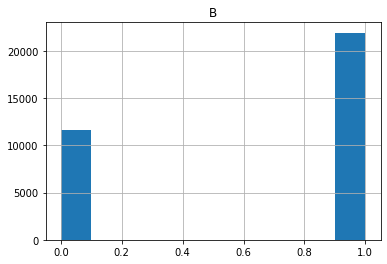

In [45]:
y_train.hist()

In order to fix the distribution of the data when training, we want to change it (in the training set only though).

First, I tried randomly undersampling the data, however that made the training set too small (down to 2.6k samples total). The results were abysmal, with basically every model getting around a 2% accuracy on the test set.

This is the code to do this, in case you want to (but you shouldn't).

In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(23236, 17)
(23236, 1)


We want to convert the y_train dataset from a Pandas DataFrame to a (n, ) Numpy array.

array([[<AxesSubplot:title={'center':'B'}>]], dtype=object)

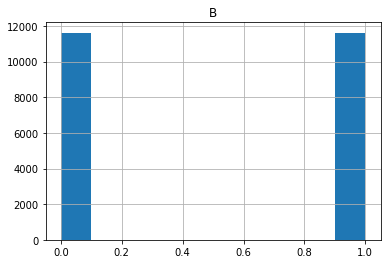

In [47]:
y_train.hist()

In [48]:
y_train = y_train.values.ravel()

Make a correlation matrix

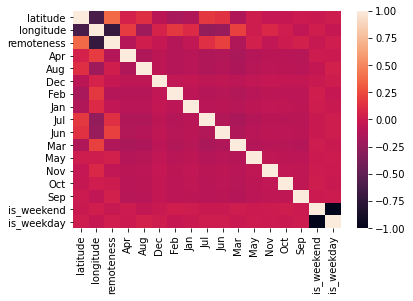

In [49]:
import seaborn as sn

corrMatrix = X_train.corr()
sn.heatmap(corrMatrix)
plt.show()

Training models, each in a cell (?)

* Dummy classifier
* K-Nearest Neighbour (KNN)
* Naïve Bayes (NB)
* Support Vector Machine (SVM)
* Decision Tree (DT)
* Random Forest (RF)
* Gradient Boosted Trees (GBT)
* Multi-Layered Perceptron (MLP)
* Artificial Neural Network (ANN)

Evaluation with confusion matrix, F1 score, etc

### Dummy classifier

In [50]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()

dummy_clf.fit(X_train, y_train)
training_accuracy = dummy_clf.score(X_train, y_train)
test_accuracy = dummy_clf.score(X_test, y_test)
print(f"Training accuracy: {training_accuracy}")  # 0.6537796074219915
print(f"Test accuracy: {test_accuracy}")  # 0.6502013422818792


y_true, y_pred = y_test , dummy_clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Training accuracy: 0.5
Test accuracy: 0.3465771812080537
Results on the test set:
              precision    recall  f1-score   support

           0       0.35      1.00      0.51      1291
           1       0.00      0.00      0.00      2434

    accuracy                           0.35      3725
   macro avg       0.17      0.50      0.26      3725
weighted avg       0.12      0.35      0.18      3725



d:\pycharmprojects\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pycharmprojects\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pycharmprojects\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(2, 30, 2)}

grid_searchKNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_searchKNN.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_searchKNN.score(X_test, y_test)))


y_true, y_pred = y_test , grid_searchKNN.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print(f"Best test set score: {grid_searchKNN.best_score_} with {grid_searchKNN.best_params_} parameters.")  # 0.6436993848306627 with {'n_neighbors': 25}

Test set score: 0.71
Results on the test set:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59      1291
           1       0.79      0.75      0.77      2434

    accuracy                           0.71      3725
   macro avg       0.68      0.68      0.68      3725
weighted avg       0.71      0.71      0.71      3725

Best test set score: 0.6640557526611102 with {'n_neighbors': 28} parameters.


### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f"GaussianNB train score: {gnb.score(X_train, y_train)}")  # 0.21296462024938845
print(f"GaussianNB test score: {gnb.score(X_test, y_test)}")  # 0.21986577181208053
print("\n")

y_true, y_pred = y_test , gnb.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

GaussianNB train score: 0.571742124289895
GaussianNB test score: 0.6198657718120806


Results on the test set:
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1291
           1       0.72      0.69      0.70      2434

    accuracy                           0.62      3725
   macro avg       0.59      0.59      0.59      3725
weighted avg       0.63      0.62      0.62      3725



### Support Vector Machine

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1]}

grid_searchSVC = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_searchSVC.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_searchSVC.score(X_test, y_test)))

y_true, y_pred = y_test , grid_searchSVC.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Test set score: 0.70
Results on the test set:
              precision    recall  f1-score   support

           0       0.59      0.44      0.50      1291
           1       0.74      0.84      0.78      2434

    accuracy                           0.70      3725
   macro avg       0.66      0.64      0.64      3725
weighted avg       0.69      0.70      0.69      3725



### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [4, 8, 16, 32, 64, 128, 256, 512], 'criterion': ['gini', 'entropy']}

grid_searchDT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid_searchDT.fit(X_train, y_train)
DT_ResultsDf = pd.DataFrame(grid_searchDT.cv_results_)

print(DT_ResultsDf)
print(f"Best test set score: {grid_searchDT.best_score_} with {grid_searchDT.best_params_} parameters.")

y_true, y_pred = y_test , grid_searchDT.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.051745      0.001166         0.022177    1.165836e-03   
1        0.072922      0.002095         0.002998    8.583069e-07   
2        0.129268      0.005639         0.003596    4.906449e-04   
3        0.156239      0.005811         0.004396    4.894148e-04   
4        0.160235      0.004918         0.003796    4.000665e-04   
5        0.156239      0.002726         0.003796    4.004243e-04   
6        0.156439      0.004026         0.004196    3.997566e-04   
7        0.159435      0.005421         0.004196    4.004959e-04   
8        0.072326      0.004796         0.003197    3.988522e-04   
9        0.119877      0.003283         0.002998    3.568323e-07   
10       0.196997      0.004257         0.003397    4.895900e-04   
11       0.259933      0.007019         0.003996    6.315050e-04   
12       0.269923      0.007671         0.003996    2.336015e-07   
13       0.269124      0.006047         0.003796

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [4, 8, 16, 32, 64, 128, 256, 512], 'n_estimators': [100, 500, 1000], 'criterion': ['gini', 'entropy']}

rf_cl = RandomForestClassifier()

grid_searchRF = GridSearchCV(rf_cl, param_grid, cv=5, n_jobs=-1)
grid_searchRF.fit(X_train, y_train)
RF_ResultsDf = pd.DataFrame(grid_searchRF.cv_results_)

print(RF_ResultsDf)
print(f"Best test set score: {grid_searchRF.best_score_} with {grid_searchRF.best_params_} parameters.")


y_true, y_pred = y_test , grid_searchRF.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.981997      0.027562         0.047751        0.002132   
1        4.767727      0.062251         0.211983        0.002133   
2        9.537251      0.066638         0.430360        0.008125   
3        1.538427      0.019258         0.059140        0.001468   
4        7.695933      0.041485         0.283710        0.005825   
5       15.394664      0.127294         0.557630        0.008533   
6        2.513030      0.027151         0.096902        0.002096   
7       12.547574      0.077233         0.496493        0.005172   
8       25.384851      0.149798         1.028150        0.027361   
9        3.188940      0.031249         0.134063        0.001719   
10      15.804644      0.106896         0.662323        0.013253   
11      31.402900      0.158079         1.357613        0.027807   
12       3.143787      0.018453         0.133064        0.002558   
13      15.667185      0.150569         0.673112

Let's make a feature importance plot.

Feature importance based on mean decrease in impurity

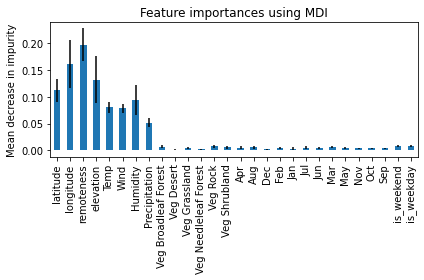

In [24]:
importances = grid_searchRF.best_estimator_.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in grid_searchRF.best_estimator_.estimators_], axis=0)

forestImportances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forestImportances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature importance based on feature permutation

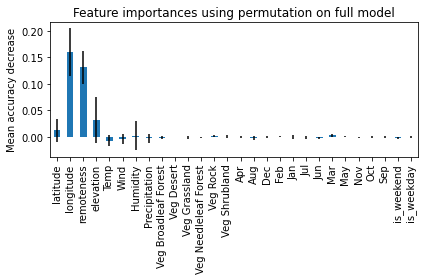

In [26]:
from sklearn.inspection import permutation_importance

importances = grid_searchRF.best_estimator_.feature_importances_
result = permutation_importance(
    grid_searchRF.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

forestImportances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forestImportances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()


### Gradient Boosted Trees (GBT)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[2,4,8,16,30,40], 'loss':['deviance', 'exponential']}

grid_searchGBT = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1)
grid_searchGBT.fit(X_train, y_train)
GBT_ResultsDf = pd.DataFrame(grid_searchGBT.cv_results_)

# print(GBT_ResultsDf)
print(f"Best test set score: {grid_searchGBT.best_score_} with {grid_searchGBT.best_params_} parameters.")

y_true, y_pred = y_test , grid_searchGBT.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_loss  \
0        2.072682      0.014077         0.008791        0.001166     deviance   
1        3.872240      0.020015         0.011388        0.000489     deviance   
2        7.846577      0.031979         0.017981        0.000631     deviance   
3       19.780578      0.206443         0.034764        0.000748     deviance   
4       54.356637      1.339518         0.082316        0.002057     deviance   
5       52.473363      0.421516         0.086512        0.002574     deviance   
6        1.989565      0.010621         0.007792        0.000400  exponential   
7        3.819695      0.023930         0.011188        0.000400  exponential   
8        7.867557      0.023578         0.017182        0.000399  exponential   
9       20.239310      0.237111         0.034565        0.000490  exponential   
10      55.482287      1.555385         0.077521        0.005195  exponential   
11      47.445501      7.825

### Multi-Layered Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(5), (5, 5), (10), (10, 10), (10, 5), (5, 10, 5), (15, 30, 15), (5, 10, 10, 5), (15, 30, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant']
}

grid_searchMLP = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=5, n_jobs=-1)

grid_searchMLP.fit(X_train, y_train)
MLP_ResultsDf = pd.DataFrame(grid_searchMLP.cv_results_)

print(MLP_ResultsDf)
print(f"Best test set score: {grid_searchMLP.best_score_} with {grid_searchMLP.best_params_} parameters.")

y_true, y_pred = y_test , grid_searchMLP.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))
